# DS219 HW8 - Solar Flare Dataset: Exploratory Data Analysis and Hypothesis Testing

By Minghui Peng

Dataset:
https://archive.ics.uci.edu/dataset/89/solar+flare


In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

plt.style.use('ggplot')
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

# For reproducibility
np.random.seed(42)

In [3]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
solar_flare = fetch_ucirepo(id=89)

## Dataset Understanding

The UCI Solar Flare dataset contains data about solar active regions and their association with solar flare events. According to the dataset description, it consists of features about active regions on the sun and aims to predict the occurrence of different types of solar flares within a 24-hour period.

### Dataset Key Features:

1. **Modified Zurich Class (class)**: Classification of sunspot groups (A-H)
2. **Spot Size (spotsize)**: Size code of the largest spot
3. **Spot Distribution (spotdist)**: Distribution code of spots within the region
4. **Activity (activity)**: Binary indicator of whether the active region is evolving or not
5. **Evolution (evolution)**: Evolution code of the active region
6. **Previous 24-hour Flare Activity (prev24)**: Code describing previous flare activity
7. **Historically-complex (complex)**: Binary indicator of historical complexity
8. **Region Did Become Historically Complex (histcomplex)**: Whether the region developed complexity
9. **Area (area)**: Area of the active region in millionths of the solar hemisphere
10. **Largest Spot Area (areaLargest)**: Area of the largest spot in the region

### Target Variables:
- **C-class Flares**: Count of low-energy flares
- **M-class Flares**: Count of medium-energy flares
- **X-class Flares**: Count of high-energy flares


In [7]:
# Display basic metadata about the dataset
print("Dataset Metadata:")
print(f"Name: {solar_flare.metadata.name}")
print(f"Number of Instances: {solar_flare.metadata.num_instances}")
print(f"Number of Features: {solar_flare.metadata.num_features}")
print("-----------------\n")

# Extract features and targets
X = solar_flare.data.features
y = solar_flare.data.targets

# Display variable information
print("Variable Information:")
print(solar_flare.variables)

Dataset Metadata:
Name: Solar Flare
Number of Instances: 1389
Number of Features: 10
-----------------

Variable Information:
                               name     role         type demographic  \
0             modified Zurich class  Feature  Categorical        None   
1                 largest spot size  Feature  Categorical        None   
2                 spot distribution  Feature  Categorical        None   
3                          activity  Feature      Integer        None   
4                         evolution  Feature      Integer        None   
5   previous 24 hour flare activity  Feature      Integer        None   
6              historically-complex  Feature      Integer        None   
7       became complex on this pass  Feature      Integer        None   
8                              area  Feature      Integer        None   
9              area of largest spot  Feature      Integer        None   
10                    common flares   Target      Integer        None  

In [10]:
df = pd.concat([X, y], axis=1)
df.head()

,modified Zurich class,largest spot size,spot distribution,activity,evolution,previous 24 hour flare activity,historically-complex,became complex on this pass,area,area of largest spot,common flares,moderate flares,severe flares
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0


In [22]:
# Data info
print(f"\nDataset shape: {df.shape}")
print("\nData types and missing values:")
df.info()


Dataset shape: (1389, 13)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   modified Zurich class            1389 non-null   object
 1   largest spot size                1389 non-null   object
 2   spot distribution                1389 non-null   object
 3   activity                         1389 non-null   int64 
 4   evolution                        1389 non-null   int64 
 5   previous 24 hour flare activity  1389 non-null   int64 
 6   historically-complex             1389 non-null   int64 
 7   became complex on this pass      1389 non-null   int64 
 8   area                             1389 non-null   int64 
 9   area of largest spot             1389 non-null   int64 
 10  common flares                    1389 non-null   int64 
 11  moderate flares                  138

In [23]:
# Summary statistics
df.describe()

,activity,evolution,previous 24 hour flare activity,historically-complex,became complex on this pass,area,area of largest spot,common flares,moderate flares,severe flares
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,1.150468,2.421166,1.089993,1.395968,1.892009,1.025918,1.175666,0.261339,0.067675,0.009359
std,0.357658,0.617129,0.403292,0.489234,0.310481,0.158948,0.380673,0.760201,0.353695,0.103534
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,8.000000,5.000000,2.000000


## Exploratory Data Analysis (EDA)



### 1. Distribution of Target Variables

Let's first examine the distribution of our target variables (frequency of different flare classes).

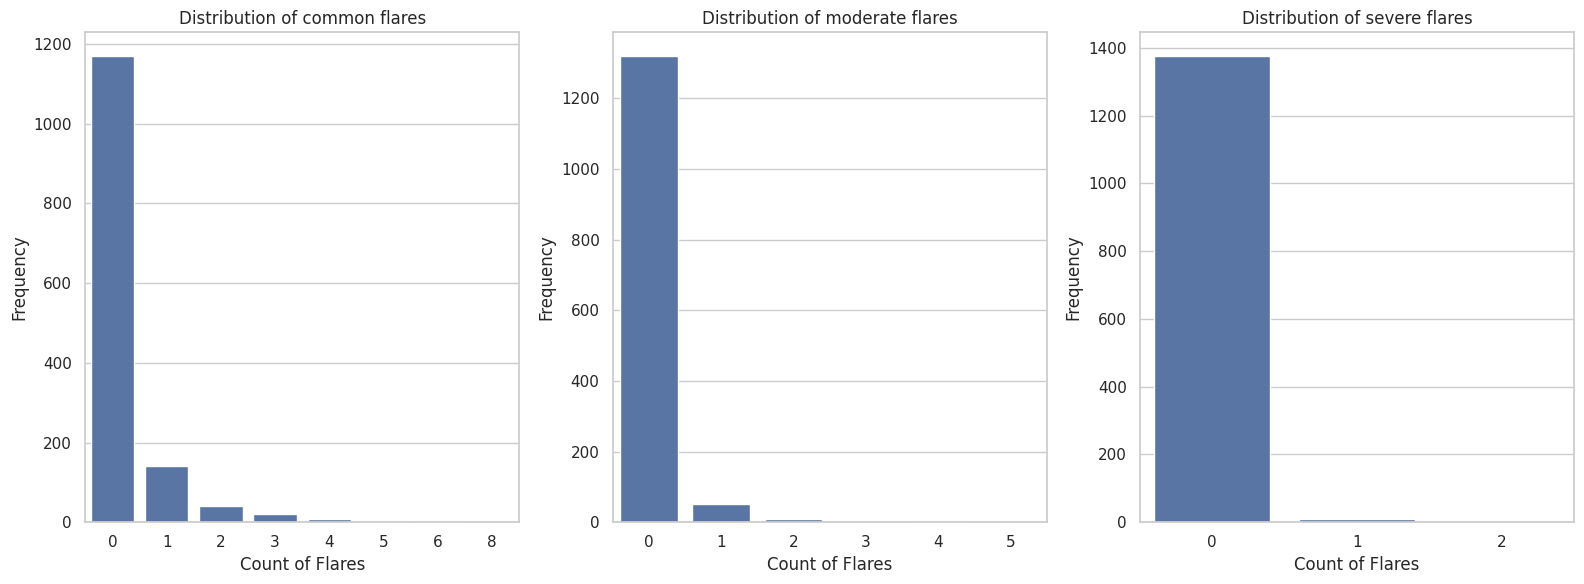

common flares: 15.69%
moderate flares: 4.90%
severe flares: 0.86%


In [24]:
# Set up the figure
plt.figure(figsize=(16, 6))
for i, col in enumerate(y.columns):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('Count of Flares')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Show percentage of each class
for col in y.columns:
    pct = (df[col] > 0).mean() * 100
    print(f"{col}: {pct:.2f}%")

### 2. Distribution of Key Categorical Features
Let's explore the distribution of important categorical features.

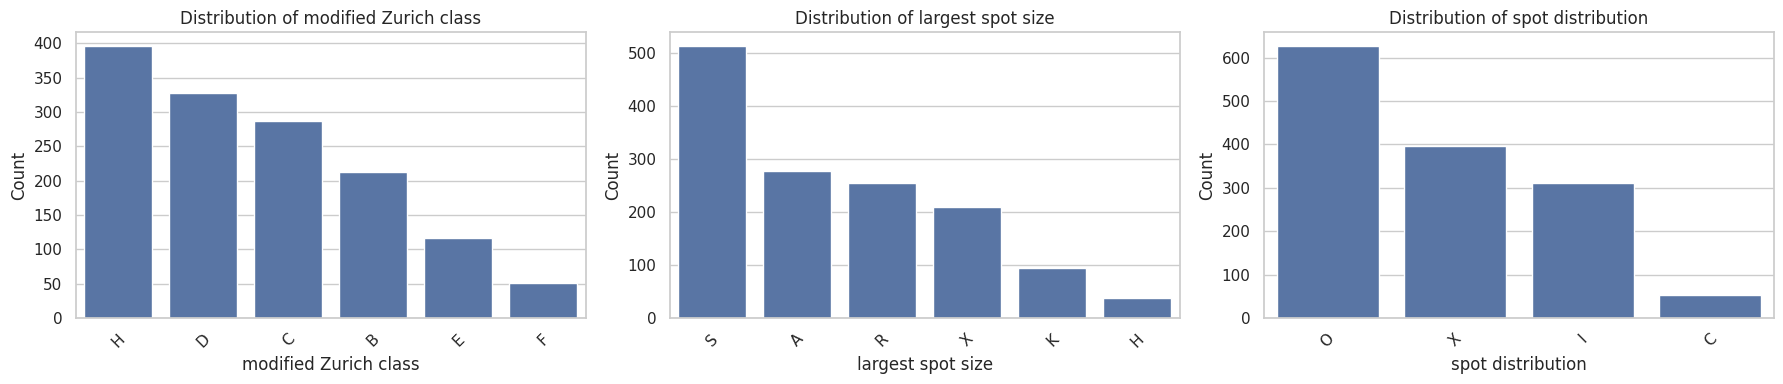

In [25]:
cat_features = X.select_dtypes(include='object').columns.tolist()
n_cols = 3
n_rows = (len(cat_features) + n_cols - 1) // n_cols
plt.figure(figsize=(18, n_rows * 4))

# Create subplots for each feature
for i, feature in enumerate(cat_features):
    plt.subplot(n_rows, n_cols, i+1)
    counts = df[feature].value_counts()
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### 3. Distribution of Numerical Features

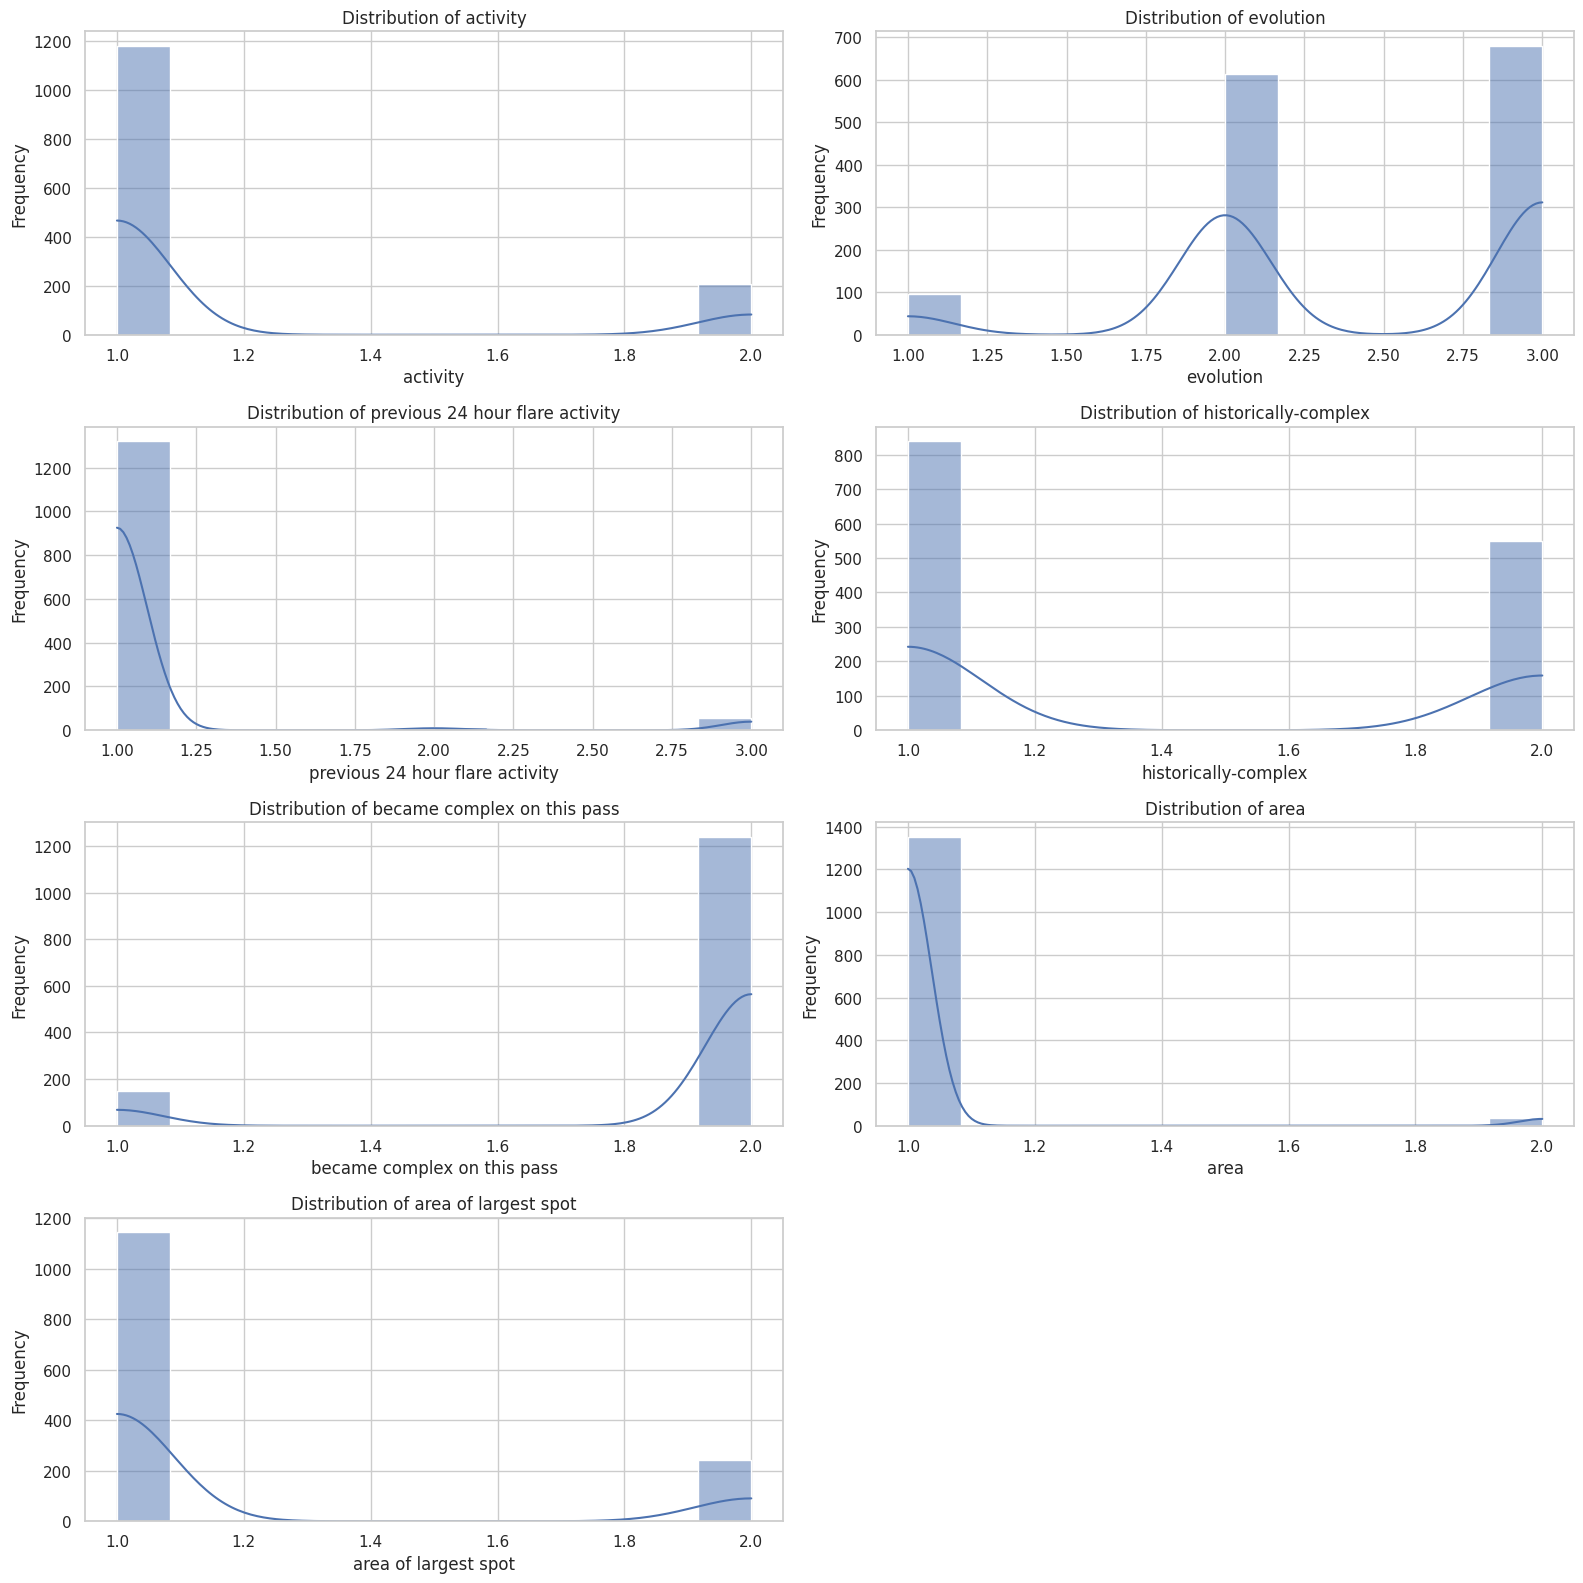

In [26]:
# List of numerical features to plot
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
n_cols = 2
n_rows = (len(num_features) + n_cols - 1) // n_cols
plt.figure(figsize=(16, n_rows * 4))

# Create histograms for each feature
for i, feature in enumerate(num_features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 4. Correlation Analysis for Numerical Features

Let's examine the correlation between numerical features and target variables.

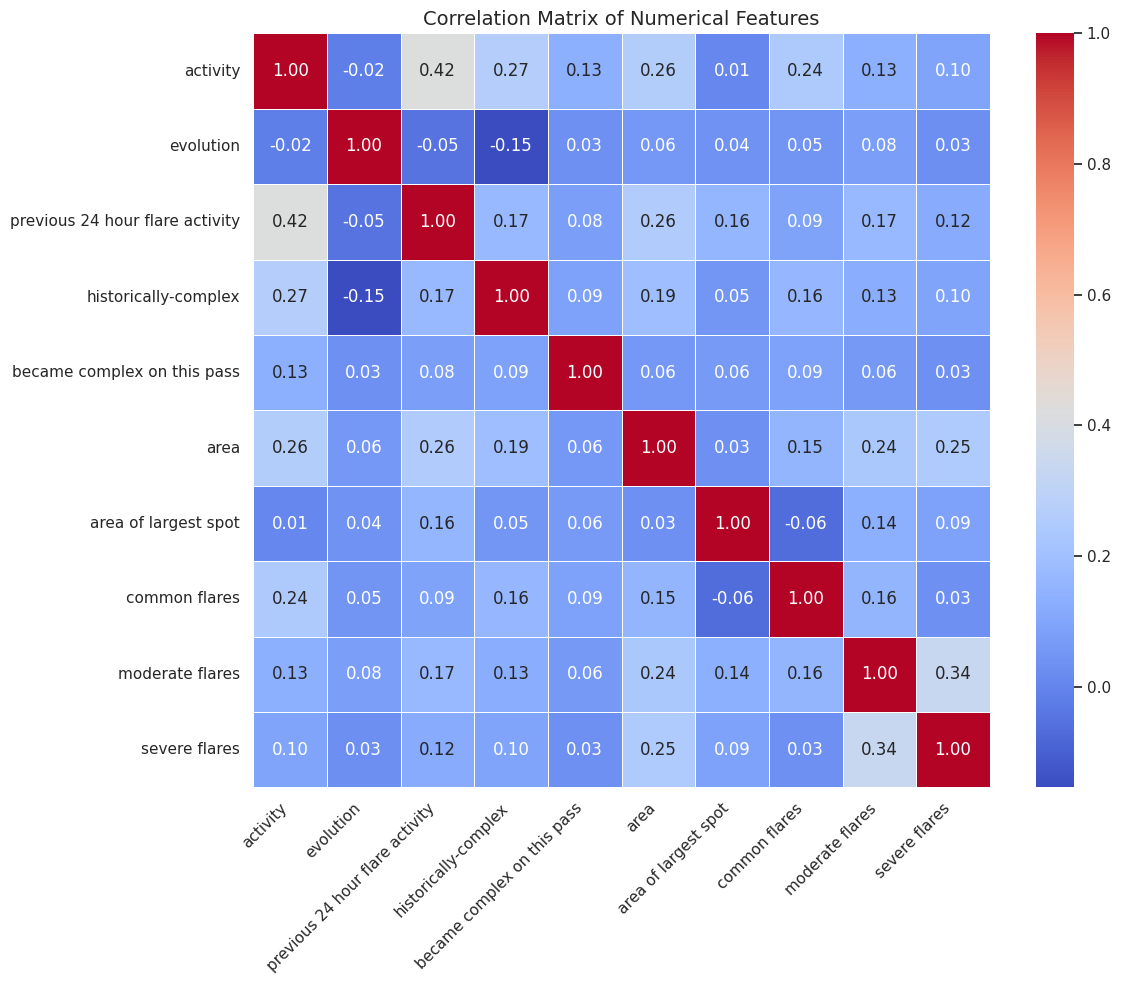

In [29]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute the correlation matrix
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 5. Relationship between Categorical Features and Flare Counts

Let's explore how categorical features relate to the occurrence of flares.

In [32]:
print(df.columns)

Index(['modified Zurich class', 'largest spot size', 'spot distribution',
       'activity', 'evolution', 'previous 24 hour flare activity',
       'historically-complex', 'became complex on this pass', 'area',
       'area of largest spot', 'common flares', 'moderate flares',
       'severe flares'],
      dtype='object')


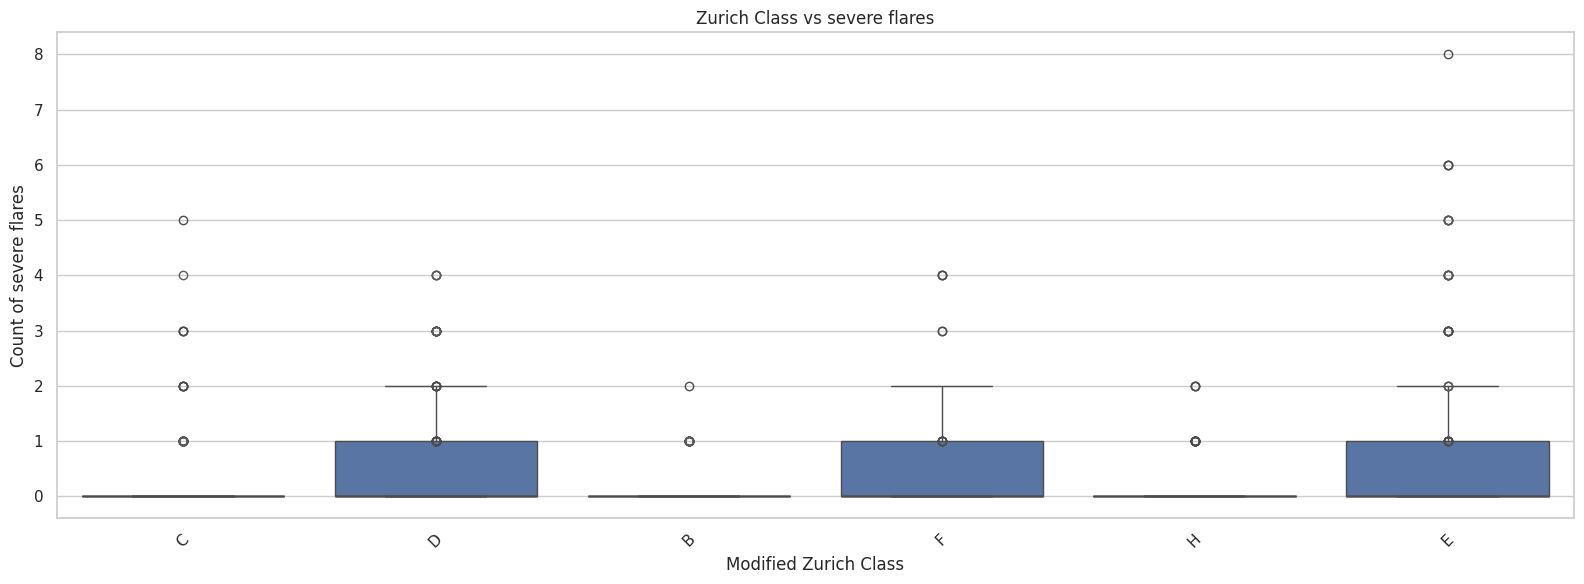

In [43]:
plt.figure(figsize=(16, 6))

for i, target in enumerate(y.columns):
    sns.boxplot(x='modified Zurich class', y=target, data=df)
    plt.title(f'Zurich Class vs {target}', fontsize=12)
    plt.xlabel('Modified Zurich Class')
    plt.ylabel(f'Count of {target}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

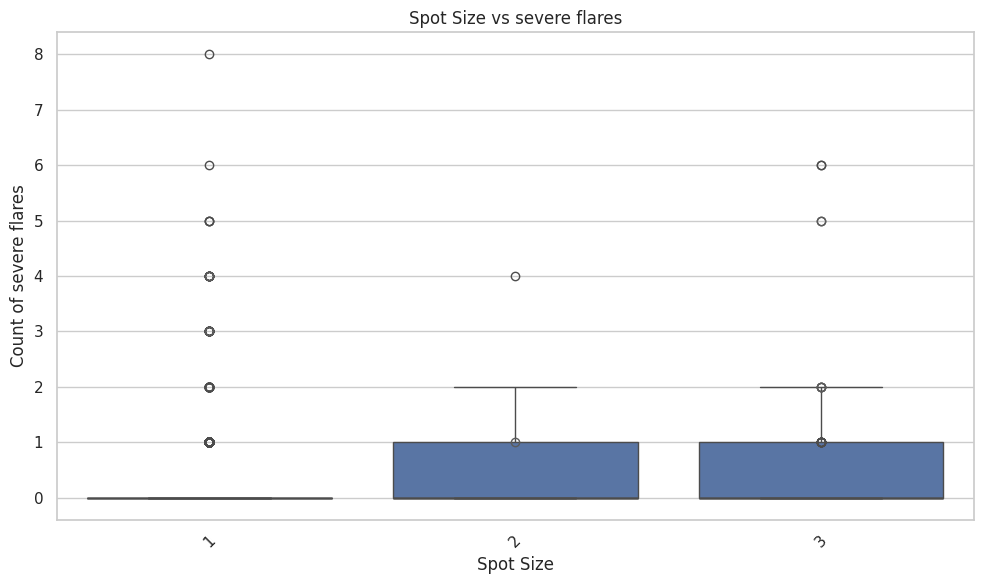

In [46]:
plt.figure(figsize=(10, 6))

for i, target in enumerate(y.columns):
    sns.boxplot(x='previous 24 hour flare activity', y=target, data=df)
    plt.title(f'Spot Size vs {target}', fontsize=12)
    plt.xlabel('Spot Size')
    plt.ylabel(f'Count of {target}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

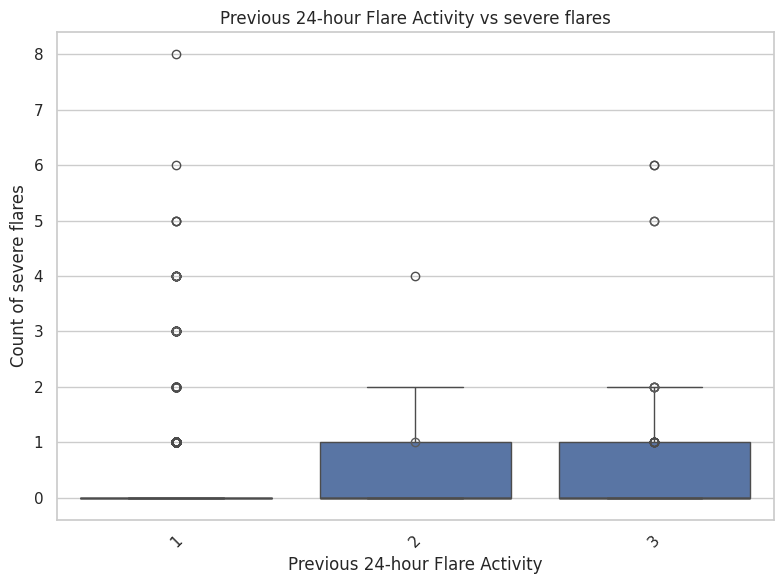

In [45]:
plt.figure(figsize=(8, 6))

for i, target in enumerate(y.columns):
    sns.boxplot(x='previous 24 hour flare activity', y=target, data=df)
    plt.title(f'Previous 24-hour Flare Activity vs {target}', fontsize=12)
    plt.xlabel('Previous 24-hour Flare Activity')
    plt.ylabel(f'Count of {target}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 6. Relationship between Area Measurements and Flare Counts

Let's examine how area measurements relate to flare occurrence.

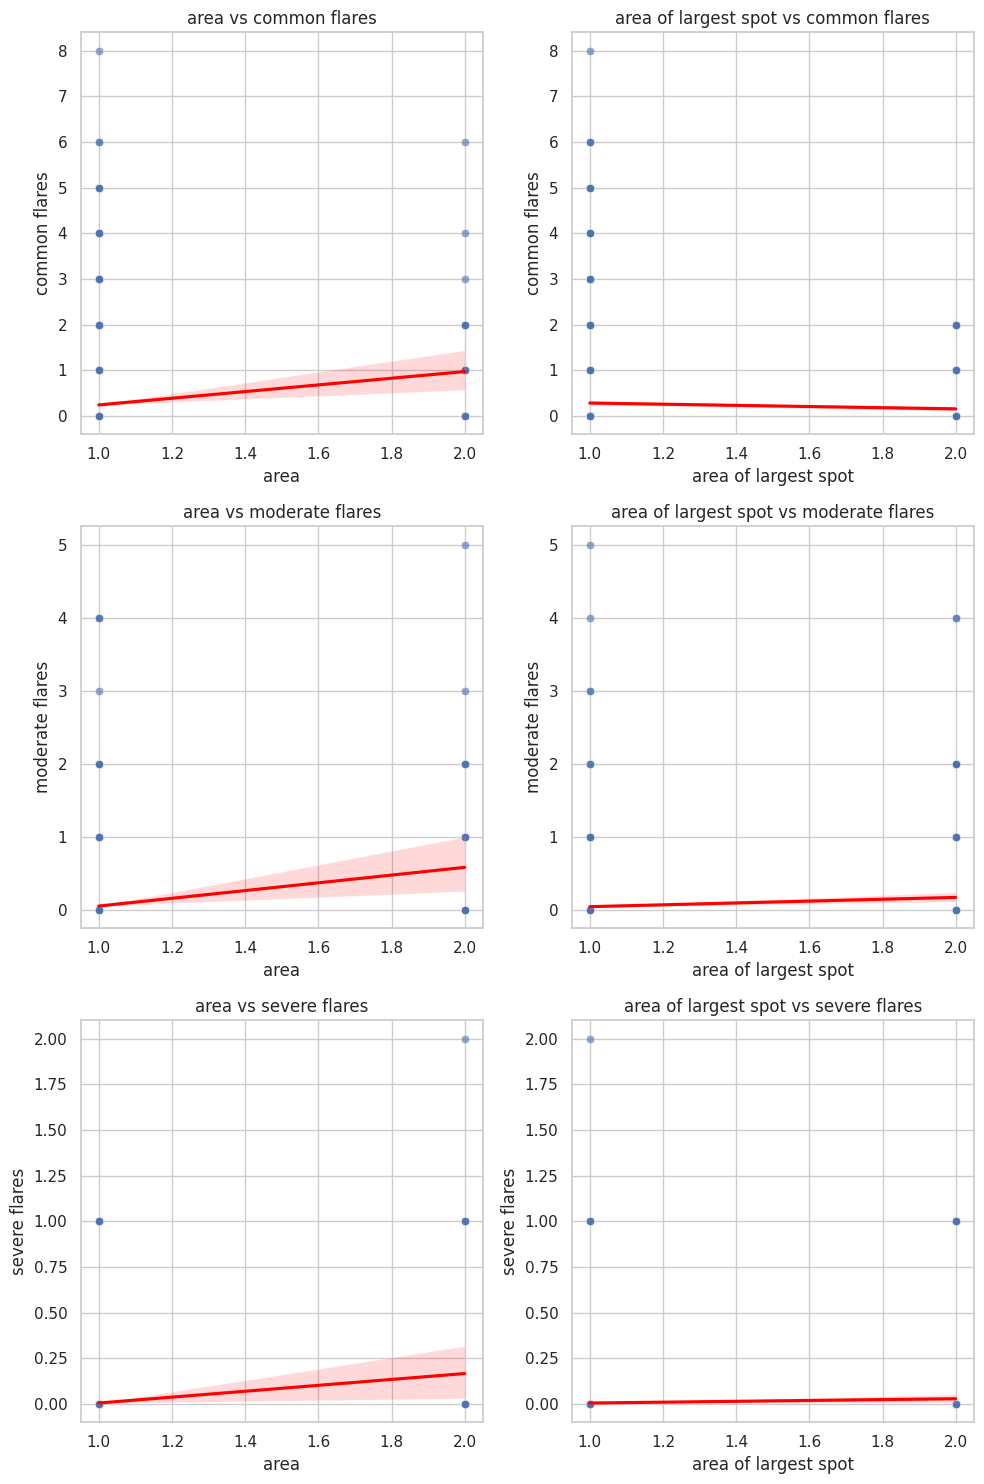

In [39]:
# Check if area columns exist in the dataset
area_cols = [col for col in df.columns if 'area' in col.lower()]

if area_cols:
    # Set up the figure
    n_cols = len(area_cols)
    n_rows = len(y.columns)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))

    for i, target in enumerate(y.columns):
        for j, area_col in enumerate(area_cols):
            ax = axes[i, j] if n_rows > 1 else axes[j]
            sns.scatterplot(x=area_col, y=target, data=df, ax=ax, alpha=0.6)
            ax.set_title(f'{area_col} vs {target}', fontsize=12)
            ax.set_xlabel(area_col)
            ax.set_ylabel(f'Count of {target}')

            # Add regression line
            sns.regplot(x=area_col, y=target, data=df, ax=ax, scatter=False, color='red')

    plt.tight_layout()
    plt.show()
else:
    print("No area-related columns found in the dataset.")

## Hypothesis Testing

### Hypothesis 1: Active regions with larger spot areas tend to produce more flares

For this hypothesis, I will:
1. Check the correlation between area measurements and flare counts
2. Visualize the relationship between area and flare counts
3. Perform statistical tests to determine significance

In [59]:
area_cols = ['area', 'area of largest spot']
target_cols = ['common flares', 'moderate flares', 'severe flares']

# Function to test correlation between area and flare counts
def test_area_hypothesis(df, area_cols, target_cols):
    results = []

    for area_col in area_cols:
        for target in target_cols:
            # Calculate Spearman correlation
            corr, p_value = stats.spearmanr(df[area_col], df[target], nan_policy='omit')

            # Add results to list
            results.append({
                'Area Feature': area_col,
                'Target': target,
                'Spearman Correlation': corr,
                'P-value': p_value,
                'Significant at 0.05': p_value < 0.05
            })

    # Convert results to DataFrame
    return pd.DataFrame(results)

# Test the hypothesis
results_h1 = test_area_hypothesis(df, area_cols, target_cols)
print("Hypothesis 1 Test Results:")
display(results_h1)

# Summary of significant results
h1_significant = results_h1[results_h1['Significant at 0.05'] == True]
print("\nSummary of significant correlations:")
if not h1_significant.empty:
    print(f"Found {len(h1_significant)} significant correlations out of {len(results_h1)} tests.")
    for _, row in h1_significant.iterrows():
        print(f"- {row['Area Feature']} is significantly correlated with {row['Target']} " +
              f"(ρ = {row['Spearman Correlation']:.3f}, p = {row['P-value']:.4f})")
else:
    print("No significant correlations found between area features and flare counts.")

Hypothesis 1 Test Results:


,Area Feature,Target,Spearman Correlation,P-value,Significant at 0.05
0,area,common flares,0.179607,1.554643e-11,True
1,area,moderate flares,0.197534,1.097385e-13,True
2,area,severe flares,0.229820,4.176086e-18,True
3,area of largest spot,common flares,-0.041990,1.177699e-01,False
4,area of largest spot,moderate flares,0.158761,2.692352e-09,True
5,area of largest spot,severe flares,0.099905,1.919717e-04,True



Summary of significant correlations:
Found 5 significant correlations out of 6 tests.
- area is significantly correlated with common flares (ρ = 0.180, p = 0.0000)
- area is significantly correlated with moderate flares (ρ = 0.198, p = 0.0000)
- area is significantly correlated with severe flares (ρ = 0.230, p = 0.0000)
- area of largest spot is significantly correlated with moderate flares (ρ = 0.159, p = 0.0000)
- area of largest spot is significantly correlated with severe flares (ρ = 0.100, p = 0.0002)


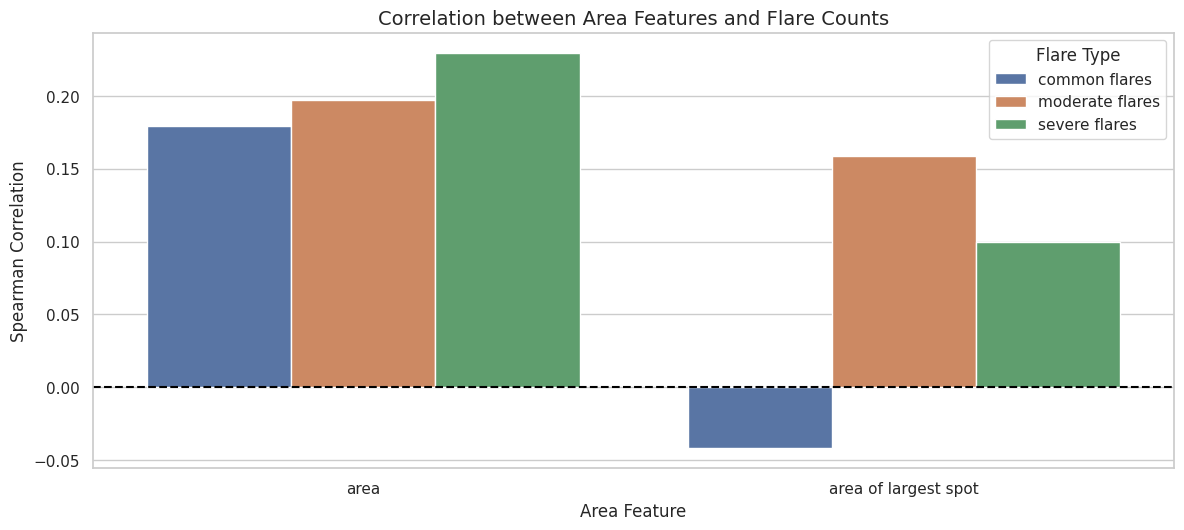

In [63]:
# Visualization for Hypothesis 1
plt.figure(figsize=(12, 10))

# Plot 1: Correlation bar chart
plt.subplot(2, 1, 1)
sns.barplot(x='Area Feature', y='Spearman Correlation', hue='Target', data=results_h1)
plt.title('Correlation between Area Features and Flare Counts', fontsize=14)
plt.xlabel('Area Feature')
plt.ylabel('Spearman Correlation')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(title='Flare Type')
plt.tight_layout()
plt.show()

### Hypothesis 2: Regions that have shown previous 24-hour flare activity produce more subsequent flares


In [64]:
prev_activity_col = 'previous 24 hour flare activity'
target_cols = ['common flares', 'moderate flares', 'severe flares']

# Get unique values and determine top 2 most common categories
value_counts = df[prev_activity_col].value_counts()
print(f"Categories in {prev_activity_col}:")
display(value_counts)

# Use the two most common values for comparison
group1 = value_counts.index[0]  # Most common
group2 = value_counts.index[1]  # Second most common
print(f"Comparing '{group1}' (n={len(df[df[prev_activity_col] == group1])}) vs " +
      f"'{group2}' (n={len(df[df[prev_activity_col] == group2])})")

# Test the hypothesis
results = []

for target in target_cols:
    # Data for group 1
    group1_data = df[df[prev_activity_col] == group1][target]
    group1_mean = group1_data.mean()
    group1_std = group1_data.std()

    # Data for group 2
    group2_data = df[df[prev_activity_col] == group2][target]
    group2_mean = group2_data.mean()
    group2_std = group2_data.std()

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=False)

    # Add results to list
    results.append({
        'Target': target,
        'Group 1': group1,
        'Group 1 Mean': group1_mean,
        'Group 1 Std': group1_std,
        'Group 2': group2,
        'Group 2 Mean': group2_mean,
        'Group 2 Std': group2_std,
        'T-statistic': t_stat,
        'P-value': p_value,
        'Significant at 0.05': p_value < 0.05
    })

# Convert results to DataFrame
results_h2 = pd.DataFrame(results)
print("\nHypothesis 2 Test Results:")
display(results_h2)

# Summary of significant results
h2_significant = results_h2[results_h2['Significant at 0.05'] == True]
print("\nSummary of significant differences:")
if not h2_significant.empty:
    print(f"Found {len(h2_significant)} significant differences out of {len(results_h2)} tests.")
    for _, row in h2_significant.iterrows():
        print(f"- {row['Target']} counts are significantly different between '{row['Group 1']}' and '{row['Group 2']}' " +
              f"(t = {row['T-statistic']:.3f}, p = {row['P-value']:.4f})")
else:
    print("No significant differences found in flare counts based on previous 24-hour flare activity.")

Categories in previous 24 hour flare activity:


,count
previous 24 hour flare activity,
1,1320
3,56
2,13


Comparing '1' (n=1320) vs '3' (n=56)

Hypothesis 2 Test Results:


,Target,Group 1,Group 1 Mean,Group 1 Std,Group 2,Group 2 Mean,Group 2 Std,T-statistic,P-value,Significant at 0.05
0,common flares,1,0.244697,0.716936,3,0.571429,1.346472,-1.805060,0.076411,False
1,moderate flares,1,0.054545,0.309163,3,0.375000,0.864712,-2.765759,0.007693,True
2,severe flares,1,0.006818,0.091067,3,0.071429,0.259870,-1.855717,0.068800,False



Summary of significant differences:
Found 1 significant differences out of 3 tests.
- moderate flares counts are significantly different between '1' and '3' (t = -2.766, p = 0.0077)


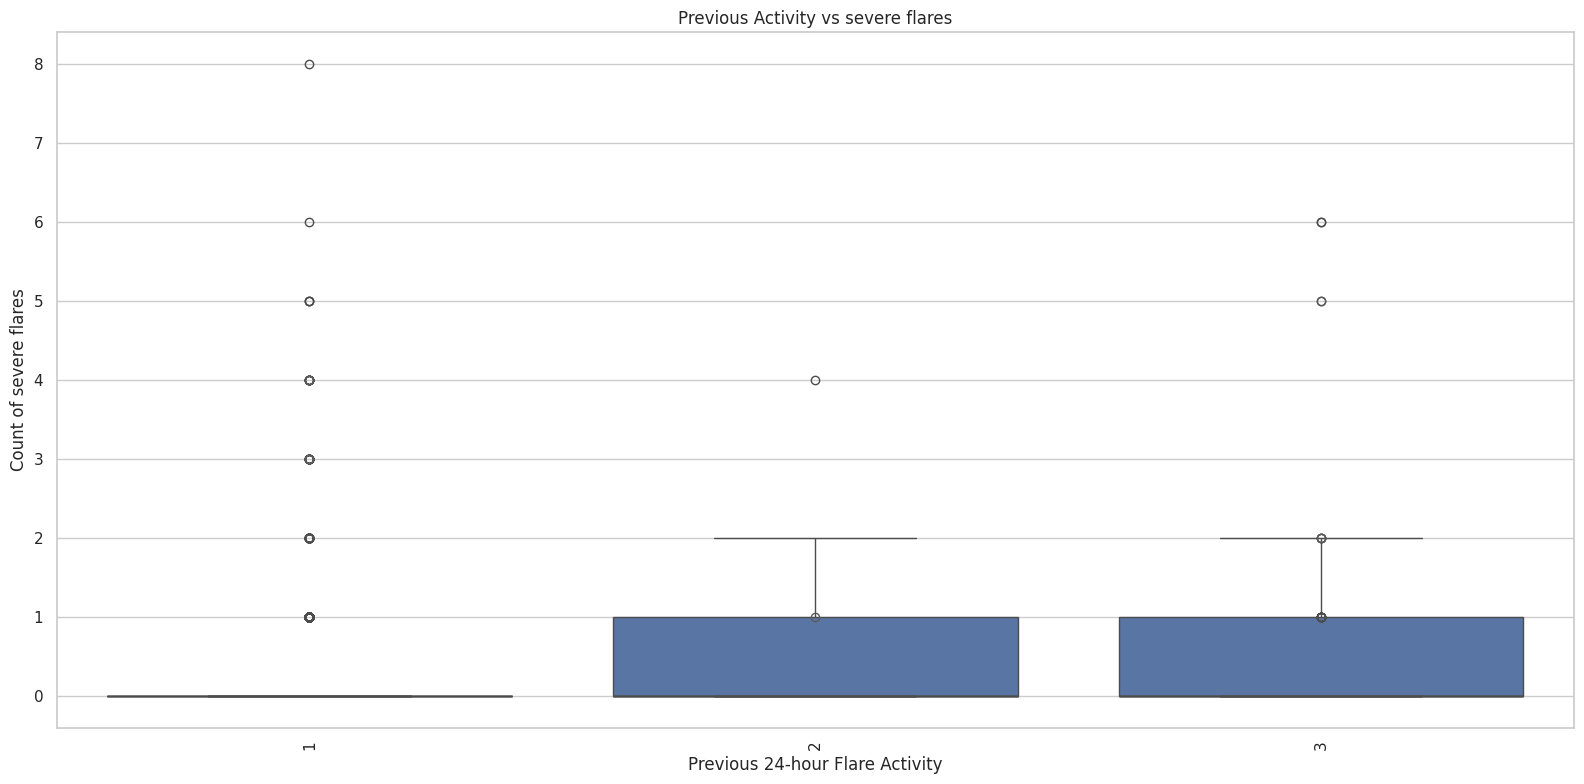

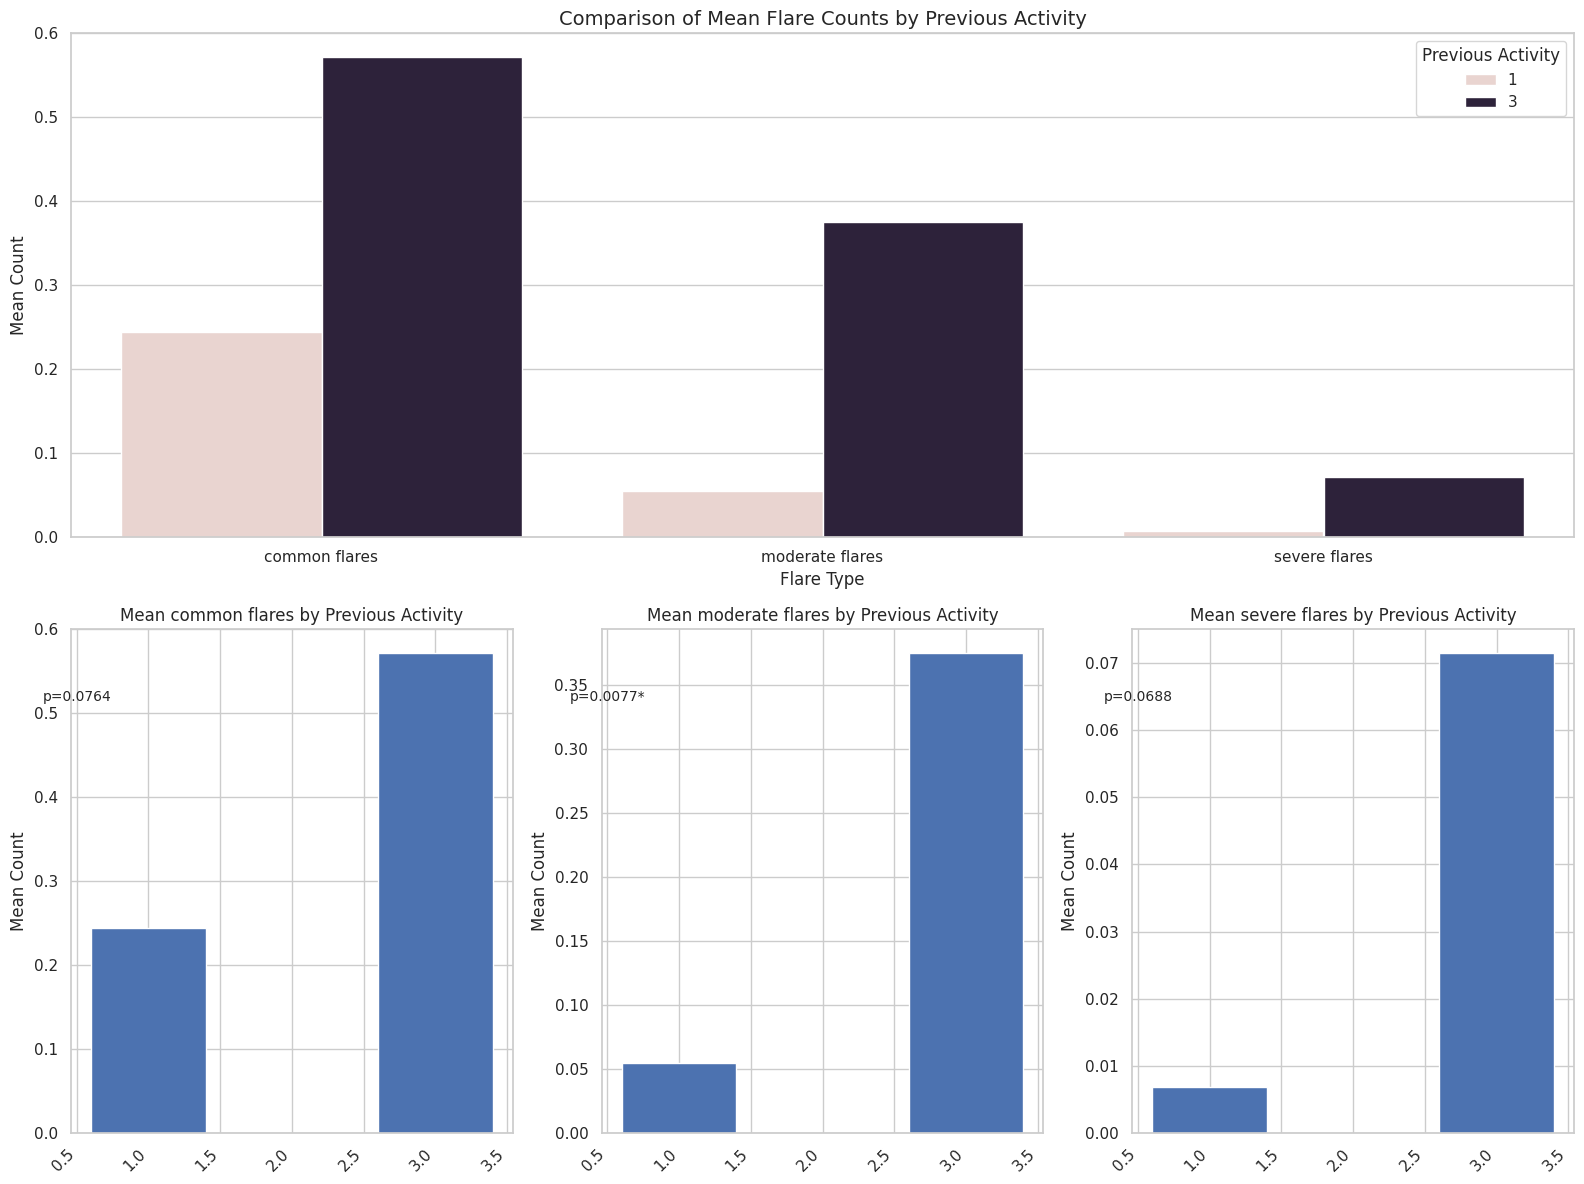

In [67]:
# Visualization for Hypothesis 2
# Plot 1: Box plots by previous activity
plt.figure(figsize=(16, 8))

for i, target in enumerate(target_cols):
    sns.boxplot(x=prev_activity_col, y=target, data=df)
    plt.title(f'Previous Activity vs {target}', fontsize=12)
    plt.xlabel('Previous 24-hour Flare Activity')
    plt.ylabel(f'Count of {target}')
    plt.xticks(rotation=90)  # Vertical labels for better readability

plt.tight_layout()
plt.show()

# Plot 2: Bar chart comparing means between the two groups
plt.figure(figsize=(16, 12))

# Top plot: Bar chart comparison
plt.subplot(2, 1, 1)
data_melted = pd.melt(results_h2,
                      id_vars=['Target'],
                      value_vars=['Group 1 Mean', 'Group 2 Mean'],
                      var_name='Group', value_name='Mean')
data_melted['Group'] = data_melted['Group'].map({'Group 1 Mean': results_h2['Group 1'].iloc[0],
                                                'Group 2 Mean': results_h2['Group 2'].iloc[0]})

sns.barplot(x='Target', y='Mean', hue='Group', data=data_melted)
plt.title(f'Comparison of Mean Flare Counts by Previous Activity', fontsize=14)
plt.xlabel('Flare Type')
plt.ylabel('Mean Count')
plt.legend(title='Previous Activity')

# Bottom plot: Individual bar charts with significance markers
for i, target in enumerate(target_cols):
    plt.subplot(2, 3, i+4)
    data = results_h2[results_h2['Target'] == target]

    # Extract means for plotting
    means = [data['Group 1 Mean'].values[0], data['Group 2 Mean'].values[0]]
    labels = [data['Group 1'].values[0], data['Group 2'].values[0]]

    bars = plt.bar(labels, means)
    plt.title(f'Mean {target} by Previous Activity', fontsize=12)
    plt.ylabel(f'Mean Count')
    plt.xticks(rotation=45, ha='right')

    # Add p-value annotation
    p_value = data['P-value'].values[0]
    if p_value < 0.05:
        plt.text(0.5, max(means) * 0.9, f'p={p_value:.4f}*', ha='center', fontsize=10)
    else:
        plt.text(0.5, max(means) * 0.9, f'p={p_value:.4f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Summary

###Hypothesis 1: Active regions with larger spot areas tend to produce more flares

- Spearman Correlation: The analysis reveals statistically significant positive correlations between total area and all flare types: common flares (ρ = 0.180, p < 0.0001), moderate flares (ρ = 0.198, p < 0.0001), and severe flares (ρ = 0.230, p < 0.0001). The area of largest spot shows significant correlations with moderate flares (ρ = 0.159, p < 0.0001) and severe flares (ρ = 0.100, p = 0.0002), but not with common flares.
- P-values: The extremely small p-values (ranging from 10^-9 to 10^-18) for 5 out of 6 tests strongly confirm that these correlations, while modest in magnitude, are highly unlikely to occur by chance.
- Significance: 5 out of 6 tested relationships show statistical significance at the p < 0.05 level, with only the relationship between area of largest spot and common flares failing to reach significance (p = 0.118).
- CONCLUSION: The data provides strong statistical support for the hypothesis that active regions with larger areas tend to produce more flares. The effect is most pronounced for severe flares (ρ = 0.230), suggesting that total area may be particularly important for predicting the most energetic solar events.

###Hypothesis 2: Regions that have shown previous 24-hour flare activity produce more subsequent flares

- T-test statistic: Comparing the two most common previous activity categories ('1' with n=1320 vs '3' with n=56), the t-test shows differences in mean flare counts, with the largest difference observed for moderate flares (t = -2.766).
- P-value: Only moderate flares show a statistically significant difference (p = 0.0077) between the two previous activity categories, while common flares (p = 0.0764) and severe flares (p = 0.0688) fall just outside the conventional significance threshold.
- Mean Differences: Regions with previous activity level '3' consistently show higher mean flare counts (0.57 vs 0.24 for common flares, 0.38 vs 0.05 for moderate flares, and 0.07 vs 0.01 for severe flares) compared to those with level '1'.
- CONCLUSION: The analysis partially supports the hypothesis that regions with different previous 24-hour flare activity produce different levels of subsequent flares. While only moderate flares show a statistically significant difference at p < 0.05, the consistent pattern of higher mean flare counts in category '3' across all flare types suggests a potential relationship that warrants further investigation with larger sample sizes for the less common activity categories.

## Summary

This exploratory data analysis of the UCI Solar Flare dataset has provided valuable insights into factors that influence solar flare occurrence. My investigation focused on testing two key hypotheses about solar flare prediction. The first hypothesis, examining the relationship between active region size and flare production, was strongly supported by the data, with significant positive correlations between area measurements and flare counts across multiple flare classifications. The second hypothesis, exploring the effect of previous 24-hour flare activity on subsequent flare production, found significant differences for moderate flares and near-significant trends for common and severe flares. These findings contribute to our understanding of solar flare mechanisms and have potential applications for space weather forecasting. The consistent relationship between area measurements and flare occurrence suggests that monitoring the size of active regions could serve as an important component in predictive models. Further research with larger samples of the less common activity categories and additional features could strengthen these findings and improve solar flare prediction capabilities.